In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mbti_1.csv")

In [3]:
df.groupby("type").count()

posts
type       
ENFJ    190
ENFP    675
ENTJ    231
ENTP    685
ESFJ     42
ESFP     48
ESTJ     39
ESTP     89
INFJ   1470
INFP   1832
INTJ   1091
INTP   1304
ISFJ    166
ISFP    271
ISTJ    205
ISTP    337

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
len(df.groupby("type").count())

16

In [6]:
#Used for class balancing. When class balancing is used dataset becomes very small.
def subsample(df):
    groups = df.groupby("type").count()
   
    groups.sort_values("posts", ascending=False, inplace=True)
    
    min_num = groups["posts"][-1]
    min_ind = groups.index[-1]
    ndf = df[df["type"] == min_ind]

    for pt in groups.index[:-1]:
        print(min_num,pt)
        tdf = df[df["type"] == pt].sample(min_num)
        ndf = pd.concat([ndf, tdf])
    return ndf

In [7]:
dff = subsample(df) 

39 INFP
39 INFJ
39 INTP
39 INTJ
39 ENTP
39 ENFP
39 ISTP
39 ISFP
39 ENTJ
39 ISTJ
39 ENFJ
39 ISFJ
39 ESTP
39 ESFP
39 ESFJ


In [8]:
dff.head(10)

type                                              posts
546   ESTJ  this is such a catch 22 |||I'm here! Although,...
595   ESTJ  intj|||isfp|||They have been taught to live a ...
764   ESTJ  'Classic format of an ESTJ response.|||Doctor ...
1112  ESTJ  'To answer your question, yes. People are capa...
1240  ESTJ  'For me it started when I was born, I wanted t...
1368  ESTJ  'INFP because both Si-Te and Fi-Ne are apparen...
1450  ESTJ  'People have their priorities. It sounds like ...
1559  ESTJ  Boring means men who are usually quite and sel...
1694  ESTJ  'classy daleks:    Hanging out with Pifanjr is...
1916  ESTJ  'Mausi, Girl, that was awesome reading. It rea...

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


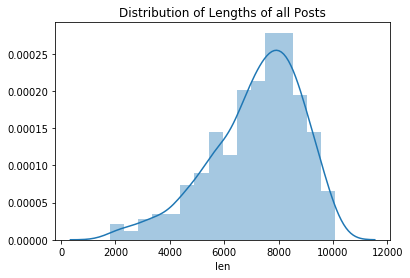

In [9]:
dff["len"] = df["posts"].apply(lambda x : len(x))
sns.distplot(dff["len"]).set_title("Distribution of Lengths of all Posts");

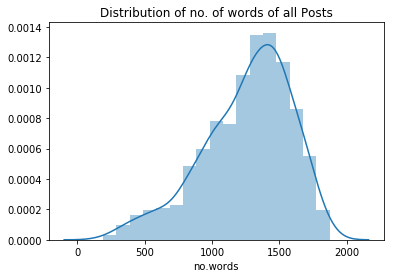

In [10]:
dff["no.words"] = df["posts"].apply(lambda x : len(x.split(' ')))
sns.distplot(dff["no.words"]).set_title("Distribution of no. of words of all Posts");

In [11]:
dff.reset_index(drop=True).head(10)

type                                              posts   len  no.words
0  ESTJ  this is such a catch 22 |||I'm here! Although,...  6629      1164
1  ESTJ  intj|||isfp|||They have been taught to live a ...  4506       830
2  ESTJ  'Classic format of an ESTJ response.|||Doctor ...  5829      1036
3  ESTJ  'To answer your question, yes. People are capa...  5562       866
4  ESTJ  'For me it started when I was born, I wanted t...  7971      1433
5  ESTJ  'INFP because both Si-Te and Fi-Ne are apparen...  7633      1315
6  ESTJ  'People have their priorities. It sounds like ...  8311      1437
7  ESTJ  Boring means men who are usually quite and sel...  7595      1352
8  ESTJ  'classy daleks:    Hanging out with Pifanjr is...  4465       756
9  ESTJ  'Mausi, Girl, that was awesome reading. It rea...  7129      1285

In [12]:
dflist = np.array(dff)
dflist.shape

(624, 4)

In [13]:
dff[['type','posts']].shape

(624, 2)

In [14]:
df2 = dff[['type','posts']].values.tolist()#df.values.tolist()

In [15]:
df2

[['ESTJ',
  "this is such a catch 22 |||I'm here! Although, I'm quite the terrible ESTJ-- my Fi developed so rapidly recently I might as well be a feeler...|||Yikes. I do not want power...|||Thank you SO SO much. This is what I had planned to do, and I spent time trying to see it from his perspective and all your thoughts were what I was thinking: consistency. As an ESTJ, once I can...|||Hi|||Thank you for your help in advance. <3  I had been dating an ESFJ since September. I've never felt this way about someone before even all my long-term bfs.  I wasn't myself in this relationship....|||We're very direct, open, and we hate dancing around things. We like things to proceed in a very step-by-step fashion. We always like to know where we stand with people and will tell you how we feel...|||EXACTLY THIS. I let other people lead and do things until things become chaotic then I take over because I can't handle the downward spiraling of chaos.|||My best friend is an INFJ, we've been besties 

In [16]:
df3 = []

In [17]:
def preprocess_reviews(type,tweets):
    tweets = [line.lower() for line in tweets]
    tweetlist = [[type,line] for line in tweets]
    return tweetlist

In [18]:
type = dflist[1][0]
a = dflist[1][1]
a = a.split('|||')
    #a_linkfree = replace_link(a)
a_split = preprocess_reviews(type,a)

In [19]:
a_split

[['ESTJ', 'intj'],
 ['ESTJ', 'isfp'],
 ['ESTJ', 'they have been taught to live a lie'],
 ['ESTJ',
  'have you notice a pattern in how the u.s.a enter ww1 and 2 right. they are going to sacrifice peoples  lives on a ship and that is how that it could enter. if you believe the illuminati, they got...'],
 ['ESTJ', 'paulina enfj dash esfp jack fenton xntp maddie fenton isfj'],
 ['ESTJ',
  'i think all that abuse from lucious messed him up a little bit. i think he is infp 9w1 4w3 6w7.  i think that is the real hakeem. hakeem istp luscious esfp'],
 ['ESTJ', 'hakeem now gives me an isxp vibe strong se'],
 ['ESTJ', 'i can see why father is often typed as xntj'],
 ['ESTJ',
  'i thought ufeffthe exact same thing about father xntp of some sort.'],
 ['ESTJ',
  'what you say makes sense because i thought he was an enfj 3w2 8w7 7w8 sp so because i do not see him as esxp 8, he would have been gradually starting to ask himself questions throughout ufeffthe season...'],
 ['ESTJ',
  'why do you believe 

In [20]:
for i in range(0,len(dff.index)):
    type = dflist[i][0]
    a = dflist[i][1]
    a = a.split('|||')
    #a_linkfree = replace_link(a)
    a_split = preprocess_reviews(type,a)
    df3.extend(a_split)

In [21]:
len(df3)

30438

In [22]:
df3 = pd.DataFrame(df3)
df3.columns = ['type','posts']

In [23]:
df3.dtypes

type     object
posts    object
dtype: object

In [24]:
df3

type                                              posts
0      ESTJ                           this is such a catch 22 
1      ESTJ  i'm here! although, i'm quite the terrible est...
2      ESTJ                      yikes. i do not want power...
3      ESTJ  thank you so so much. this is what i had plann...
4      ESTJ                                                 hi
5      ESTJ  thank you for your help in advance. <3  i had ...
6      ESTJ  we're very direct, open, and we hate dancing a...
7      ESTJ  exactly this. i let other people lead and do t...
8      ESTJ  my best friend is an infj, we've been besties ...
9      ESTJ  hmm... perhaps you can try being less talkativ...
10     ESTJ  not sure-- but i really like aziz ansari humor...
11     ESTJ  lol. i wonder if it's because i'm a female est...
12     ESTJ  i either write in my journal (usually realizat...
13     ESTJ  recently started dating an esfj guy. everythin...
14     ESTJ  thank you for asking first of all. i have a re...
15     ESTJ                            is that a deal breaker?
16     ESTJ                                this is everything.
17     ESTJ  i don't want to make assumptions for everyone,...
18     ESTJ  what do you guys do at night after dinner/befo...
19     ESTJ                                           this. :)
20     ESTJ  i've never been withdrawn and uncommunicative!...
21     ESTJ  communication with infps have always been very...
22     ESTJ  where do you isfps hide tho? o.o haha... i've ...
23     ESTJ  definitely not. i would never forget if i was ...
24     ESTJ  hell no. i think we're one of the most direct ...
25     ESTJ  for me personally: restlessness - this usually...
26     ESTJ  i would say we would be one of the most reliab...
27     ESTJ  i think it's much easier if the female is istp...
28     ESTJ  interestingly enough, i'm an estj, got complet...
29     ESTJ                                    double post -_-
...     ...                                                ...
30408  ESFJ  i think intps are incredibly charming! as an e...
30409  ESFJ  i really enjoy intp friendship and communicati...
30410  ESFJ  i do feel this way from time to time...not wit...
30411  ESFJ  since the infp started it....i will join in (e...
30412  ESFJ  the nameless composer, i am an esfj who marrie...
30413  ESFJ  i think those pairings are ideal for ease of c...
30414  ESFJ  t men with fe.  i have dated fi men (entj and ...
30415  ESFJ  jcal, that is a very interesting observation. ...
30416  ESFJ  i'm a female esfj and have only known two othe...
30417  ESFJ  despite being very high on the e side of esfj ...
30418  ESFJ  are you certain he is an esfj? sounds much mor...
30419  ESFJ  you're writing style reminded me a lot of my e...
30420  ESFJ  i'm sorry more esfjs aren't on this forum to s...
30421  ESFJ  i have two very close infp friends. i feel i c...
30422  ESFJ  this is about a different estj ( a peer at wor...
30423  ESFJ  how much bluntness or critism is part of your ...
30424  ESFJ  god no. i feel like i can pretend to be an ins...
30425  ESFJ  my closest friends are infp, intp, intj. i lov...
30426  ESFJ                           what type are you? intj?
30427  ESFJ                       have come to love intps.....
30428  ESFJ  i find the entj quite sensitive. by this i mea...
30429  ESFJ  i'm an esfj and scored 15. i am very sensitive...
30430  ESFJ  i think being an esfj sets you up for loneline...
30431  ESFJ  in general i like isfjs. however, i like them ...
30432  ESFJ  i have read descriptions of what members on he...
30433  ESFJ  i think esfj fits the best....but is still lac...
30434  ESFJ  your profile pic is very esfj like as well (fe...
30435  ESFJ  i don't think mbti is enough for me. i use si ...
30436  ESFJ  i'm an esfj and can relate to 90% of this. you...
30437  ESFJ  i know an enfps who talks a lot like the esfj ...

[30438 rows x 2 columns]

In [25]:
import re
def cleanPosts( posts ) :
    #posts = re.sub( r'\|\|\|', r' ', posts ) 
    posts = re.sub( r'http\S+', r'', posts )
    posts = re.sub( r'(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)|(\@)|(\_)|(\-)|(\+)|(\*)|(\/)|(\#)|(\&)|(\$)|(\{)|(\})','', posts )
    posts = posts.lower()
    return posts

In [26]:
df3['clean_posts'] = df3['posts'].apply(cleanPosts)

In [32]:
df3

type                                              posts  \
0      ESTJ                           this is such a catch 22    
1      ESTJ  i'm here! although, i'm quite the terrible est...   
2      ESTJ                      yikes. i do not want power...   
3      ESTJ  thank you so so much. this is what i had plann...   
4      ESTJ                                                 hi   
5      ESTJ  thank you for your help in advance. <3  i had ...   
6      ESTJ  we're very direct, open, and we hate dancing a...   
7      ESTJ  exactly this. i let other people lead and do t...   
8      ESTJ  my best friend is an infj, we've been besties ...   
9      ESTJ  hmm... perhaps you can try being less talkativ...   
10     ESTJ  not sure-- but i really like aziz ansari humor...   
11     ESTJ  lol. i wonder if it's because i'm a female est...   
12     ESTJ  i either write in my journal (usually realizat...   
13     ESTJ  recently started dating an esfj guy. everythin...   
14     ESTJ  thank you for asking first of all. i have a re...   
15     ESTJ                            is that a deal breaker?   
16     ESTJ                                this is everything.   
17     ESTJ  i don't want to make assumptions for everyone,...   
18     ESTJ  what do you guys do at night after dinner/befo...   
19     ESTJ                                           this. :)   
20     ESTJ  i've never been withdrawn and uncommunicative!...   
21     ESTJ  communication with infps have always been very...   
22     ESTJ  where do you isfps hide tho? o.o haha... i've ...   
23     ESTJ  definitely not. i would never forget if i was ...   
24     ESTJ  hell no. i think we're one of the most direct ...   
25     ESTJ  for me personally: restlessness - this usually...   
26     ESTJ  i would say we would be one of the most reliab...   
27     ESTJ  i think it's much easier if the female is istp...   
28     ESTJ  interestingly enough, i'm an estj, got complet...   
29     ESTJ                                    double post -_-   
...     ...                                                ...   
30408  ESFJ  i think intps are incredibly charming! as an e...   
30409  ESFJ  i really enjoy intp friendship and communicati...   
30410  ESFJ  i do feel this way from time to time...not wit...   
30411  ESFJ  since the infp started it....i will join in (e...   
30412  ESFJ  the nameless composer, i am an esfj who marrie...   
30413  ESFJ  i think those pairings are ideal for ease of c...   
30414  ESFJ  t men with fe.  i have dated fi men (entj and ...   
30415  ESFJ  jcal, that is a very interesting observation. ...   
30416  ESFJ  i'm a female esfj and have only known two othe...   
30417  ESFJ  despite being very high on the e side of esfj ...   
30418  ESFJ  are you certain he is an esfj? sounds much mor...   
30419  ESFJ  you're writing style reminded me a lot of my e...   
30420  ESFJ  i'm sorry more esfjs aren't on this forum to s...   
30421  ESFJ  i have two very close infp friends. i feel i c...   
30422  ESFJ  this is about a different estj ( a peer at wor...   
30423  ESFJ  how much bluntness or critism is part of your ...   
30424  ESFJ  god no. i feel like i can pretend to be an ins...   
30425  ESFJ  my closest friends are infp, intp, intj. i lov...   
30426  ESFJ                           what type are you? intj?   
30427  ESFJ                       have come to love intps.....   
30428  ESFJ  i find the entj quite sensitive. by this i mea...   
30429  ESFJ  i'm an esfj and scored 15. i am very sensitive...   
30430  ESFJ  i think being an esfj sets you up for loneline...   
30431  ESFJ  in general i like isfjs. however, i like them ...   
30432  ESFJ  i have read descriptions of what members on he...   
30433  ESFJ  i think esfj fits the best....but is still lac...   
30434  ESFJ  your profile pic is very esfj like as well (fe...   
30435  ESFJ  i don't think mbti is enough for me. i use si ...   
30436  ESFJ  i'm an esfj and can relate to 90% 

In [33]:
df3.head(5)

type                                              posts  \
0  ESTJ                           this is such a catch 22    
1  ESTJ  i'm here! although, i'm quite the terrible est...   
2  ESTJ                      yikes. i do not want power...   
3  ESTJ  thank you so so much. this is what i had plann...   
4  ESTJ                                                 hi   

                                         clean_posts  
0                             this is such a catch    
1  im here although im quite the terrible estj my...  
2                          yikes i do not want power  
3  thank you so so much this is what i had planne...  
4                                                 hi

In [29]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Janu&Vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Janu&Vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
# We want to remove these from the posts
type_list = ['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp',
       'isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj']
# Lemmatize
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

# Cache the stop words for speed 
cachedStopWords = stopwords.words("english")

#Final list of stop words
swords = cachedStopWords.extend(type_list)

In [34]:
tokenized_data = df3['clean_posts'].apply( lambda x : x.split())#nltk.word_tokenize(x)
tokenized_data.head(5)

0                           [this, is, such, a, catch]
1    [im, here, although, im, quite, the, terrible,...
2                     [yikes, i, do, not, want, power]
3    [thank, you, so, so, much, this, is, what, i, ...
4                                                 [hi]
Name: clean_posts, dtype: object

In [35]:
lemm_data = tokenized_data.apply( lambda x : [lemmatiser.lemmatize(i) for i in x])
lemm_data.head(5)

0                           [this, is, such, a, catch]
1    [im, here, although, im, quite, the, terrible,...
2                     [yikes, i, do, not, want, power]
3    [thank, you, so, so, much, this, is, what, i, ...
4                                                 [hi]
Name: clean_posts, dtype: object

In [39]:
lemm_data.shape

(30438,)

In [41]:
lemm_data

0                               [this, is, such, a, catch]
1        [im, here, although, im, quite, the, terrible,...
2                         [yikes, i, do, not, want, power]
3        [thank, you, so, so, much, this, is, what, i, ...
4                                                     [hi]
5        [thank, you, for, your, help, in, advance, <, ...
6        [were, very, direct, open, and, we, hate, danc...
7        [exactly, this, i, let, other, people, lead, a...
8        [my, best, friend, is, an, infj, weve, been, b...
9        [hmm, perhaps, you, can, try, being, le, talka...
10       [not, sure, but, i, really, like, aziz, ansari...
11       [lol, i, wonder, if, it, because, im, a, femal...
12       [i, either, write, in, my, journal, usually, r...
13       [recently, started, dating, an, esfj, guy, eve...
14       [thank, you, for, asking, first, of, all, i, h...
15                            [is, that, a, deal, breaker]
16                                  [this, is, everythin

In [42]:
lemm_data = pd.Series(lemm_data)

In [43]:
lemm_data.head()

0                           [this, is, such, a, catch]
1    [im, here, although, im, quite, the, terrible,...
2                     [yikes, i, do, not, want, power]
3    [thank, you, so, so, much, this, is, what, i, ...
4                                                 [hi]
Name: clean_posts, dtype: object

In [44]:
len(lemm_data)

30438

In [45]:
lemm_data.iloc[0]

['this', 'is', 'such', 'a', 'catch']

In [46]:
lemmatized_data = []
for i in range(len(lemm_data)):
    lemmatized_data.append(' '.join(lemm_data.iloc[i]))

lemmatized_data

['this is such a catch',
 'im here although im quite the terrible estj my fi developed so rapidly recently i might a well be a feeler',
 'yikes i do not want power',
 'thank you so so much this is what i had planned to do and i spent time trying to see it from his perspective and all your thought were what i wa thinking consistency a an estj once i can',
 'hi',
 'thank you for your help in advance < i had been dating an esfj since september ive never felt this way about someone before even all my longterm bfs i wasnt myself in this relationship',
 'were very direct open and we hate dancing around thing we like thing to proceed in a very stepbystep fashion we always like to know where we stand with people and will tell you how we feel',
 'exactly this i let other people lead and do thing until thing become chaotic then i take over because i cant handle the downward spiraling of chaos',
 'my best friend is an infj weve been besties for year now so just from my experience the relationship

In [47]:
len(lemmatized_data)

30438

In [49]:
df3['clean_posts'] = lemmatized_data

In [51]:
df3.head()

type                                              posts  \
0  ESTJ                           this is such a catch 22    
1  ESTJ  i'm here! although, i'm quite the terrible est...   
2  ESTJ                      yikes. i do not want power...   
3  ESTJ  thank you so so much. this is what i had plann...   
4  ESTJ                                                 hi   

                                         clean_posts  
0                               this is such a catch  
1  im here although im quite the terrible estj my...  
2                          yikes i do not want power  
3  thank you so so much this is what i had planne...  
4                                                 hi

In [52]:
from sklearn.decomposition import TruncatedSVD

In [53]:
from sklearn.model_selection import train_test_split

In [59]:
posts = df3['clean_posts']
ptype = df3['type']

In [60]:
posts.shape , ptype.shape

((30438,), (30438,))

In [61]:
posts = pd.Series(posts)
ptype = pd.Series(ptype)

In [62]:
type(posts) , type(ptype)

TypeError: 'str' object is not callable

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [105]:
tfidf = TfidfVectorizer(
                        stop_words=swords,
                        max_features = 500)

In [106]:
tfposts = tfidf.fit_transform(posts)

In [111]:
tsvd = TruncatedSVD(n_components=110)
tposts = tsvd.fit_transform(tfposts)

In [112]:
tposts.shape

(30438, 110)

In [114]:
ptype = pd.get_dummies(ptype)

In [115]:
x_train, x_test, y_train, y_test = train_test_split(tposts, ptype, test_size=0.1, stratify=ptype, random_state=42)

In [116]:
x_train.shape , y_train.shape

((27394, 110), (27394, 16))

In [117]:
x_test.shape , y_test.shape

((3044, 110), (3044, 16))

In [118]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

In [119]:
y_train.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [133]:
#model architecture
model = Sequential([Dense(321, activation='relu', input_shape = (x_train[0].shape), kernel_regularizer=regularizers.l1(0.01)),
                    Dropout(0.5, noise_shape=None, seed=None),
                    Dense(152, activation='relu',kernel_regularizer=regularizers.l1(0.01)),
                    Dropout(0.5, noise_shape=None, seed=None),
                    
                    Dense(16, activation='softmax')])


In [134]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 321)               35631     
_________________________________________________________________
dropout_19 (Dropout)         (None, 321)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 152)               48944     
_________________________________________________________________
dropout_20 (Dropout)         (None, 152)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 16)                2448      
Total params: 87,023
Trainable params: 87,023
Non-trainable params: 0
_________________________________________________________________


In [135]:
adam = keras.optimizers.adam(lr = 0.001)
# loss = 'sparse_categorical_crossentropy',
model.compile(loss = 'categorical_crossentropy',
              optimizer = adam,
              metrics = ['accuracy'])

In [136]:
history = model.fit(x_train, y_train.values, epochs=19, verbose=2, validation_split=0.1)

Train on 24654 samples, validate on 2740 samples
Epoch 1/19
 - 5s - loss: 5.3716 - acc: 0.0615 - val_loss: 2.8769 - val_acc: 0.0573
Epoch 2/19
 - 4s - loss: 2.8765 - acc: 0.0647 - val_loss: 2.8761 - val_acc: 0.0679
Epoch 3/19
 - 4s - loss: 2.8764 - acc: 0.0621 - val_loss: 2.8764 - val_acc: 0.0679
Epoch 4/19
 - 4s - loss: 2.8762 - acc: 0.0638 - val_loss: 2.8765 - val_acc: 0.0573
Epoch 5/19
 - 4s - loss: 2.8763 - acc: 0.0657 - val_loss: 2.8769 - val_acc: 0.0573
Epoch 6/19
 - 4s - loss: 2.8762 - acc: 0.0657 - val_loss: 2.8764 - val_acc: 0.0573
Epoch 7/19
 - 4s - loss: 2.8762 - acc: 0.0646 - val_loss: 2.8765 - val_acc: 0.0573
Epoch 8/19
 - 4s - loss: 2.8762 - acc: 0.0636 - val_loss: 2.8763 - val_acc: 0.0573
Epoch 9/19
 - 4s - loss: 2.8762 - acc: 0.0642 - val_loss: 2.8769 - val_acc: 0.0573
Epoch 10/19
 - 4s - loss: 2.8762 - acc: 0.0650 - val_loss: 2.8771 - val_acc: 0.0679
Epoch 11/19
 - 4s - loss: 2.8762 - acc: 0.0660 - val_loss: 2.8767 - val_acc: 0.0573
Epoch 12/19
 - 4s - loss: 2.8761 - a

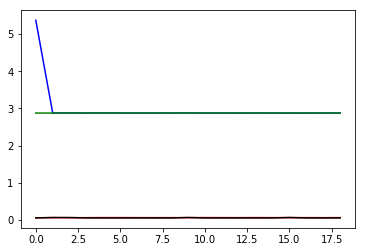

In [137]:
plt.plot(history.epoch, history.history['loss'], 'b',
        history.epoch, history.history['acc'], 'r',
        history.epoch, history.history['val_loss'], 'g',
        history.epoch, history.history['val_acc'], 'k')